<a href="https://colab.research.google.com/github/Giuseppe86-lab/Affidabilit-Creditizia/blob/main/Affidabilita_creditizia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Esplorazione del dataset

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import clone
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
URL = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_scoring.csv'
df = pd.read_csv(URL, index_col=0)
print(df.shape)
df.head()

(338427, 18)


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
ID,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1


In questo dataset abbiamo 338427 samples, 17 feature (**ID** è solo il numero identificativo del cliente quindi non contiene informazioni) e una variabile **target**:

1. **CODE_GENDER**: variabile qualitativa categorica che indica il sesso del cliente.
2. **FLAG_OWN_CAR**: variabile qualitativa categorica che indica il possesso di un'automobile.
3. **FLAG_OWN_REALTY**: variabile qualitativa categorica che indica se il cliente possiede una casa.
4. **CNT_CHILDREN**: variabile quantitativa discreta che indica il numero dei figli.
5. **AMT_INCOME_TOTAL**: variabile quantitativa continua del reddito annuale.
6. **NAME_INCOME_TYPE**: variabile qualitativa categorica che indica il tipo di reddito.
7. **NAME_EDUCATION_TYPE**: variabile qualitativa categorica che indica il tipo di formazione del cliente.
8. **NAME_FAMILY_STATUS**: variabile qualitativa categorica che indica lo stato di famiglia del cliente.
9. **NAME_HOUSING_TYPE**: variabile qualitativa categorica che indica il tipo di abitazione.
10. **DAYS_BIRTH**: variabile quantitativa negativa continua che indica i giorni passati dalla nascita. Per permettere una migliore leggibilità di questo dato divido per -365,25 in modo tale da conoscere l'età in anni e mettere in evidenza eventuali anomalie. La nuova feature si chiamerà **AGE**
11. **DAYS_EMPLOYED**: variabile quantitativa continua che indica i giorni trascorsi dalla data di assunzione, se è positiva indica i giorni da quando il cliente è disoccupato. Anche in questo caso divido per 365,25 per conoscere da quanti anni il cliente lavora (negativo) o è disoccupato (positivo). La nuova feature si chiamerà **YEARS_EMPLOYED**.
12. **FLAG_MOBIL**: variabile qualitativa categorica che indica la presenza di un numero di cellulare.
13. **FLAG_WORK_PHONE**: variabile qualitativa categorica che indica la presenza di un numero di telefono di lavoro.
14. **FLAG_PHONE**: variabile qualitativa categorica che indica la presenza di un numero di telefono.
15. **FLAG_EMAIL**: variabile qualitativa categorica che indica la presenza di un indirizzo mail.
16. **OCCUPATION_TYPE**: variabile qualtitativa categorica che indica il tipo di occupazione.
17. **CNT_FAM_MEMBERS**: variabile quantitativa discreta che indica il numero di familiari.
18. **TARGET**: variabile qualitativa ordinale che vale 1 se il client eha una elevata affidabilità creditizia (pagamento costante delle rate), 0 altrimenti.

L'obiettivo del progetto è sviluppare un **modello di machine learning** che preveda se i clienti hanno una buona affidabilità creditizia.

In [3]:
DAYS_FOR_YEARS = 365.25
df['AGE'] = -df['DAYS_BIRTH'] /DAYS_FOR_YEARS
df['YEARS_EMPLOYED'] = (df['DAYS_EMPLOYED'] / DAYS_FOR_YEARS)
df = df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED'])
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET,AGE,YEARS_EMPLOYED
ID,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1.0,1.0,0.0,0.0,NaN,2.0,0,32.867899,-12.435318
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1.0,1.0,0.0,0.0,NaN,2.0,0,32.867899,-12.435318
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1.0,0.0,0.0,0.0,Security staff,2.0,0,58.792608,-3.104723
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,0.0,1.0,1.0,Sales staff,1.0,1,52.320329,-8.353183
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,0.0,1.0,1.0,Sales staff,1.0,1,52.320329,-8.353183


## 1.1 Caratteristiche generali del dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338427 entries, 5008804 to 6392180
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          338427 non-null  object 
 1   FLAG_OWN_CAR         338427 non-null  object 
 2   FLAG_OWN_REALTY      338427 non-null  object 
 3   CNT_CHILDREN         338427 non-null  int64  
 4   AMT_INCOME_TOTAL     338427 non-null  float64
 5   NAME_INCOME_TYPE     338427 non-null  object 
 6   NAME_EDUCATION_TYPE  338427 non-null  object 
 7   NAME_FAMILY_STATUS   338426 non-null  object 
 8   NAME_HOUSING_TYPE    338426 non-null  object 
 9   FLAG_MOBIL           338426 non-null  float64
 10  FLAG_WORK_PHONE      338426 non-null  float64
 11  FLAG_PHONE           338426 non-null  float64
 12  FLAG_EMAIL           338426 non-null  float64
 13  OCCUPATION_TYPE      235085 non-null  object 
 14  CNT_FAM_MEMBERS      338426 non-null  float64
 15  TARGET         

Nel nostro dataset sono presenti feature di vario tipo:

- **int**: Target
- **float**: AMT_INCOME_TOTAL, AGE, YEARS_EMPLOYED, FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, CNT_FAM_MEMBERS
- **object**: CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE

È importante andare a osservare il tipo delle feature perché in base alle loro caratteristiche e tipologie dovremmo svolgere delle diverse analisi esplorative. Le informazioni ottenute con *df.info()* ci dicono anche che nel nostro dataset ci sono valori mancanti.

In [5]:
df.isnull().sum(axis=0)

,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,1
NAME_HOUSING_TYPE,1
FLAG_MOBIL,1


Possiamo osservare che per circa un terzo dei sample del nostro dataset non è presente l'informazione su la feature **OCCUPATION_TYPE**, anche in altre feature ci sono valori mancanti ma un numero irrisori, invece per questa dovrebbe valutare la migliore strategia da adottare in fare di preprocessing. Vogliamo verificare se per caso tutti quei valori mancanti non appartengano ad uno stesso sample:

In [6]:
df[df['NAME_FAMILY_STATUS'].isna()]

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET,AGE,YEARS_EMPLOYED
ID,,,,,,,,,,,,,,,,,,
6392180,F,N,N,0,67500.0,Working,Secondary / se,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


Effettivamente come sospettavamo tutti i NaN si concentrano in uno stesso sample che quindi possiamo decidere di eliminare.

In [7]:
df = df.dropna(subset=['NAME_FAMILY_STATUS'])
df.isnull().sum(axis=0)

,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0
FLAG_MOBIL,0


Verifichiamo se ci sono samples ripetuti:

In [8]:
duplicate_rows = df.duplicated()
duplicates = df[df.duplicated()]
duplicates

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET,AGE,YEARS_EMPLOYED
ID,,,,,,,,,,,,,,,,,,
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1.0,1.0,0.0,0.0,NaN,2.0,0,32.867899,-12.435318
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,0.0,1.0,1.0,Sales staff,1.0,1,52.320329,-8.353183
5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,0.0,1.0,1.0,Sales staff,1.0,1,52.320329,-8.353183
5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,0.0,1.0,1.0,Sales staff,1.0,1,52.320329,-8.353183
5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,1.0,0.0,0.0,0.0,NaN,1.0,0,61.503080,999.980835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6392174,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,1.0,0.0,0.0,0.0,NaN,2.0,0,64.780287,999.980835
6392175,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,1.0,0.0,0.0,0.0,NaN,2.0,0,64.780287,999.980835
6392177,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,1.0,0.0,0.0,0.0,NaN,2.0,0,64.780287,999.980835


Nel nostro dataset c'è il 78% di valori duplicati che non portano informazioni aggiuntive al nostro modello, quindi possiamo eliminarli.

In [9]:
df= df.drop_duplicates()
print(df.shape)
df.isnull().sum(axis=0)

(75256, 18)


,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0
FLAG_MOBIL,0


Eliminando i sample duplicati i valori mancanti di **OCCUPATION_TYPE** si sono ridotti proporzionalmente.

In [10]:
df[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AGE', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
count,75256.000000,7.525600e+04,75256.000000,75256.000000,75256.000000
mean,0.409070,1.848544e+05,44.015389,154.939953,2.165874
std,0.719442,1.069342e+05,11.459478,370.208309,0.896137
min,0.000000,2.610000e+04,20.503765,-47.997262,1.000000
25%,0.000000,1.125000e+05,34.498973,-8.553046,2.000000
50%,0.000000,1.575000e+05,43.722108,-4.087611,2.000000
75%,1.000000,2.250000e+05,53.338809,-1.089665,3.000000
max,19.000000,6.750000e+06,68.996578,999.980835,20.000000


Ciò che salta subito all'occhio è che il 75% dei clienti ha al massimo 1 figlio ma c'è un valore anomale per un cliente con 19 figli. Notiamo che il massimo di **YEARS_EMPLOYED** è 999.98 nel corso dell'analisi dovremmo decidere come trattare questo dato anomalo.

In [11]:
df.describe(include='object')

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,75256,75256,75256,75256,75256,75256,75256,53131
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,49005,47677,51376,39178,52714,50239,67360,13955


Vediamo quali sono i valori assunti da **NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE**:

In [12]:
columns = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

for column in columns:
    print(f'{column}: {df[column].unique()} \n')

NAME_INCOME_TYPE: ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student'] 

NAME_EDUCATION_TYPE: ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 

NAME_FAMILY_STATUS: ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow'] 

NAME_HOUSING_TYPE: ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment'] 

OCCUPATION_TYPE: [nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff'] 



Partendo da **NAME_INCOME_TYPE** possiamo vedere se riusciamo a trovare qualche informazione per i **NaN** di **OCCUPATION_TYPE**.

NAME_INCOME_TYPE
Pensioner               12115
Working                  6084
Commercial associate     2913
State servant            1011
Student                     2
Name: count, dtype: int64


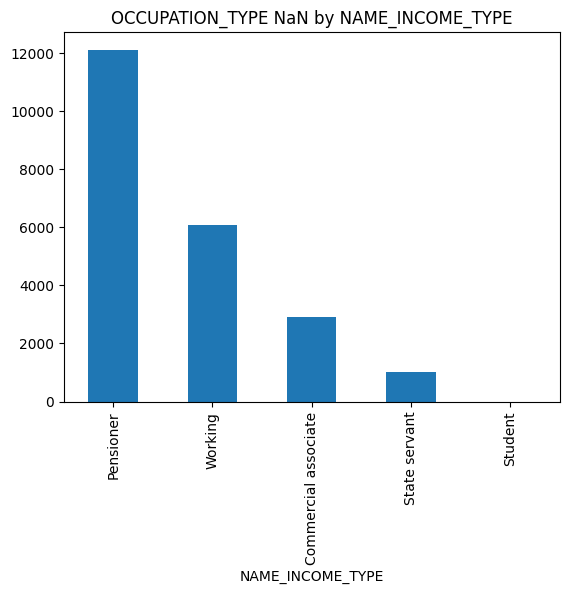

In [13]:
nan_occupation_type = df[df['OCCUPATION_TYPE'].isna()]
print(nan_occupation_type['NAME_INCOME_TYPE'].value_counts())
nan_occupation_type['NAME_INCOME_TYPE'].value_counts().plot(kind='bar')
plt.title('OCCUPATION_TYPE NaN by NAME_INCOME_TYPE')
plt.show()

Da questo grafico possiamo dedurre alcune informazioni per eliminare alcuni dei **NaN** possiamo introdurre le 'professioni' Retired e Learner, per gli altri usiamo Missing.

In [14]:
df.loc[(df['OCCUPATION_TYPE'].isna()) & (df['NAME_INCOME_TYPE'] == 'Pensioner'), 'OCCUPATION_TYPE'] = 'Retired'
df.loc[(df['OCCUPATION_TYPE'].isna()) & (df['NAME_INCOME_TYPE'] == 'Student'), 'OCCUPATION_TYPE'] = 'Learner'
df.loc[(df['OCCUPATION_TYPE'].isna()), 'OCCUPATION_TYPE'] = 'Missing'

## 1.2 Analisi Univariata

In questa fase andiamo a studiare le distribuzioni delle singole feature.

Per le variabile categoriche realizziamo dei grafici a barre per vedere la distribuzione delle diverse classi, se sono o meno equamente rappresentate. Aggiungiamo a queste anche la variabile **CNT_CHILDREN** che sebene sia una variabile quantitativa, dal punto di vista delle distribuzioni ha delle analogie con le feature qualitative.

Inoltre, eseguiamo un cast per cambiare le variabili denominate **FLAG_** in int invece che tenerle in float, essendo variabili che assumono solo due valori (0,1).

In [15]:
df['FLAG_MOBIL'] = df['FLAG_MOBIL'].astype(int)
df['FLAG_WORK_PHONE'] = df['FLAG_WORK_PHONE'].astype(int)
df['FLAG_PHONE'] = df['FLAG_PHONE'].astype(int)
df['FLAG_EMAIL'] = df['FLAG_EMAIL'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75256 entries, 5008804 to 6392170
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          75256 non-null  object 
 1   FLAG_OWN_CAR         75256 non-null  object 
 2   FLAG_OWN_REALTY      75256 non-null  object 
 3   CNT_CHILDREN         75256 non-null  int64  
 4   AMT_INCOME_TOTAL     75256 non-null  float64
 5   NAME_INCOME_TYPE     75256 non-null  object 
 6   NAME_EDUCATION_TYPE  75256 non-null  object 
 7   NAME_FAMILY_STATUS   75256 non-null  object 
 8   NAME_HOUSING_TYPE    75256 non-null  object 
 9   FLAG_MOBIL           75256 non-null  int64  
 10  FLAG_WORK_PHONE      75256 non-null  int64  
 11  FLAG_PHONE           75256 non-null  int64  
 12  FLAG_EMAIL           75256 non-null  int64  
 13  OCCUPATION_TYPE      75256 non-null  object 
 14  CNT_FAM_MEMBERS      75256 non-null  float64
 15  TARGET               75256 non-nu

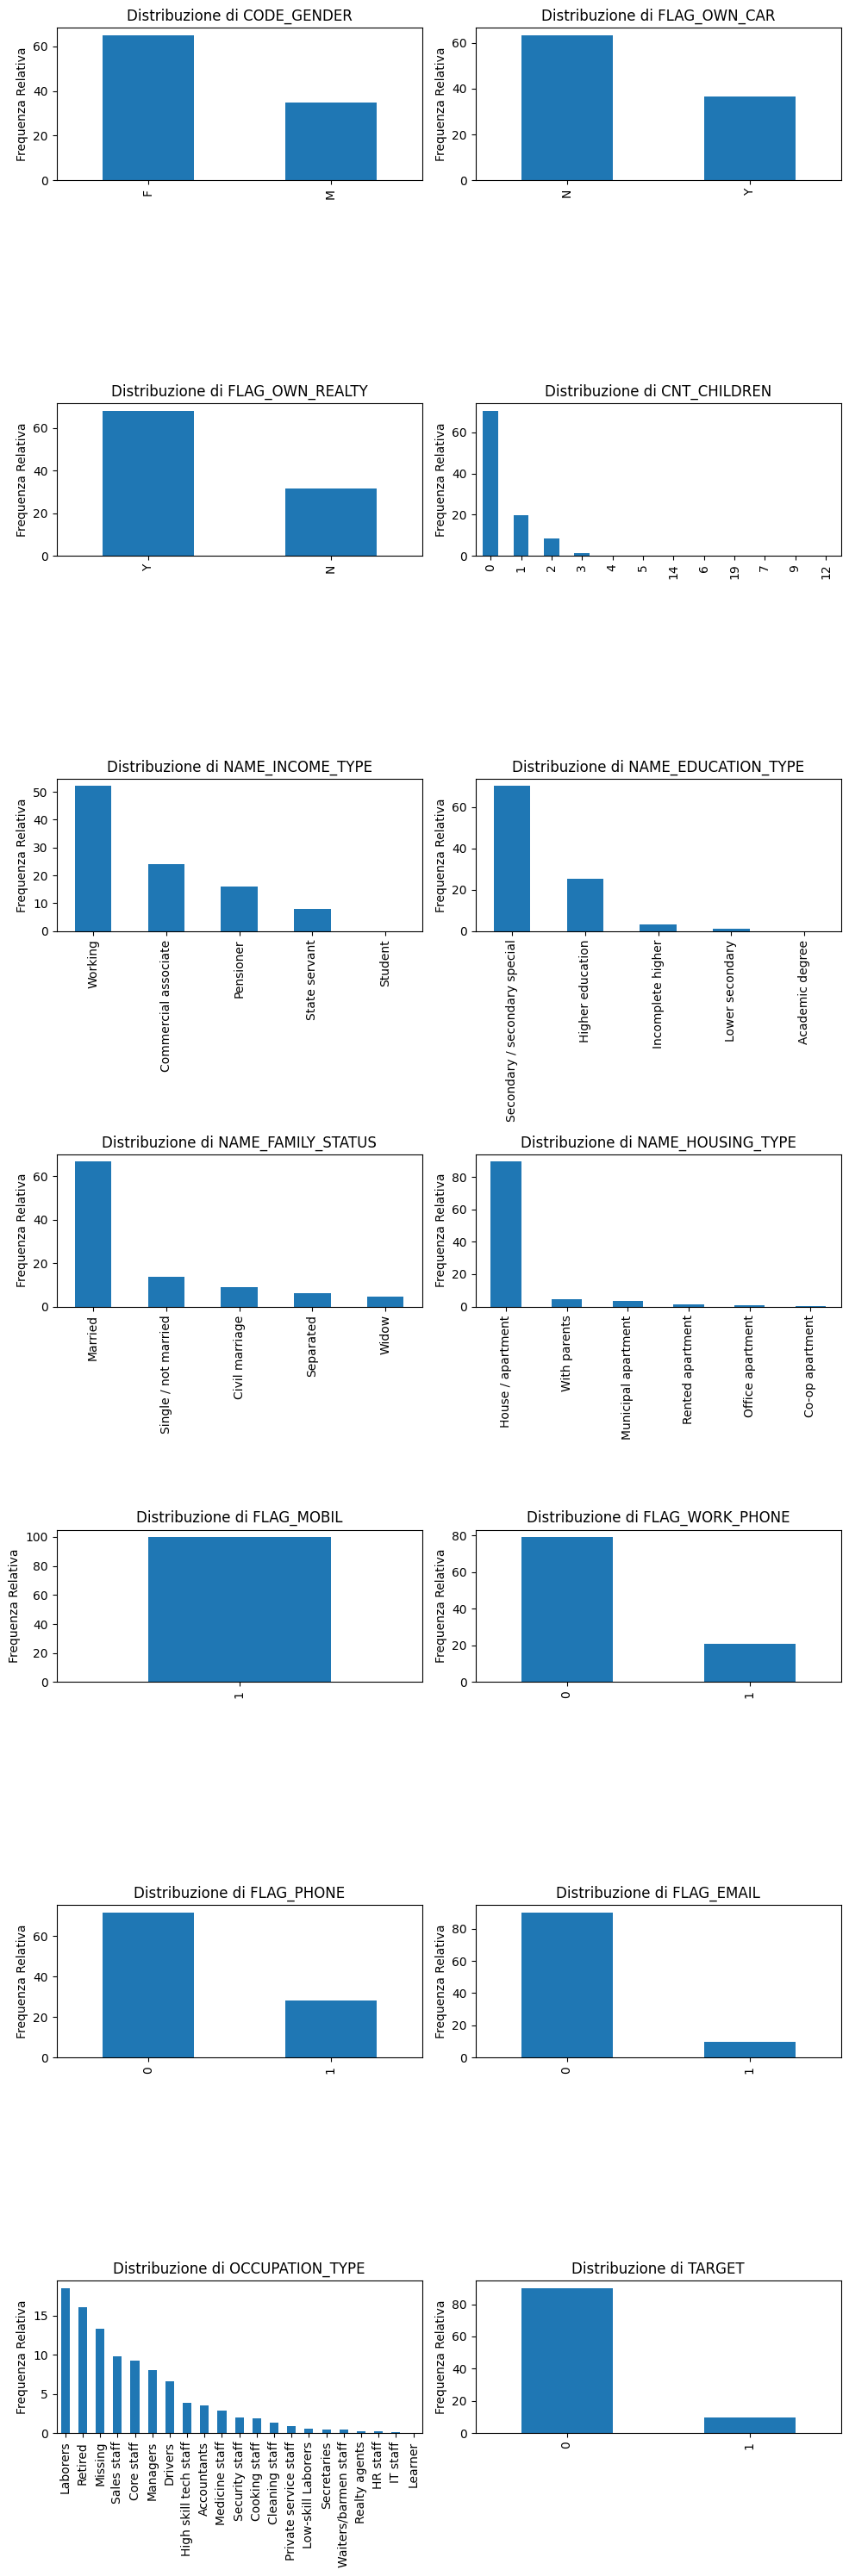

In [16]:
#Definiamo un array con i nomi delle feature divise per tipologia di dato
columns_obj_int = df.select_dtypes(include=['object', 'int']).columns.tolist()
columns_float = df.select_dtypes(include=['float']).columns.tolist()

num_entries = df.shape[0]

fig, axes = plt.subplots(7, 2, figsize=(10, 30))
for i, column in enumerate(columns_obj_int):
  row = i // 2
  col = i % 2
  counts_per = (df[column].value_counts()/num_entries)*100
  counts_per.plot(kind='bar', ax=axes[row, col])
  axes[row, col].set_title(f'Distribuzione di {column}')
  axes[row, col].set_xlabel('')
  axes[row, col].set_ylabel('Frequenza Relativa')

plt.tight_layout()
plt.show()

Questi grafici a barre ci permettono di individuare alcune caratteristiche del nostro dataset:

- **CODE_GENDER**: circa il 60% dei clienti sono donne.
- **FLAG_OWN_CAR**: circa il 60% non possiede una macchina di proprietà.
- **FLAG_OWN_REALTY**: più del 60% ha una casa di proprietà.
- **CNT_CHILDREN**: il 70% non ha figli.
- **NAME_INCOME_TYPE**: il 50% sono lavoratori.
- **NAME_EDUCATION_TYPE**: il 70% sono diplomati.
- **NAME_FAMILY_STATUS**: il 70% sono sposati.
- **NAME_HOUSING_TYPE**: l'85% vive in una casa indipendente o in un appartamento.
- **FLAG_MOBIL**: quasi il 100% possiede un telefono cellulare.
- **FLAG_WORK_PHONE**: l'80% non ha un telefono di lavoro.
- **FLAG_PHONE**: il 70% non ha il telefono a casa.
- **FLAG_MAIL**: più dell'80% non ha una mail.
- **OCCUPATION_TYPE**: circa il 50% del dataset è formato dalle tre categorie: Laborers, Retired e Missing.
- **TARGET**: circa il 90% dei clienti non ha una buona affidabilità creditizia, cioè non paga le rate regolarmente.

Per le variabili continue realizziamo sia un istogramma che un boxplot.

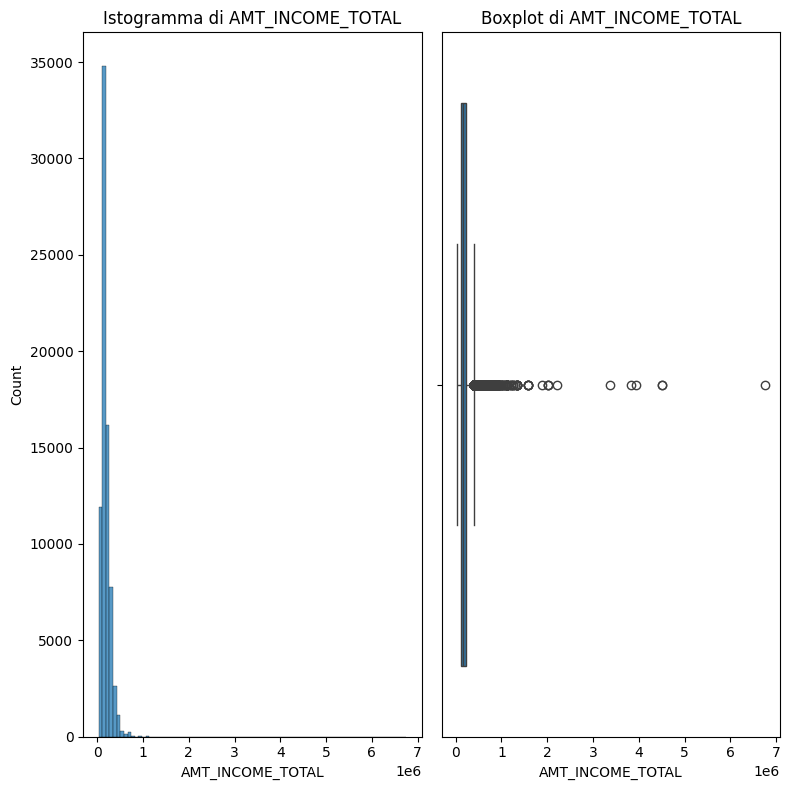

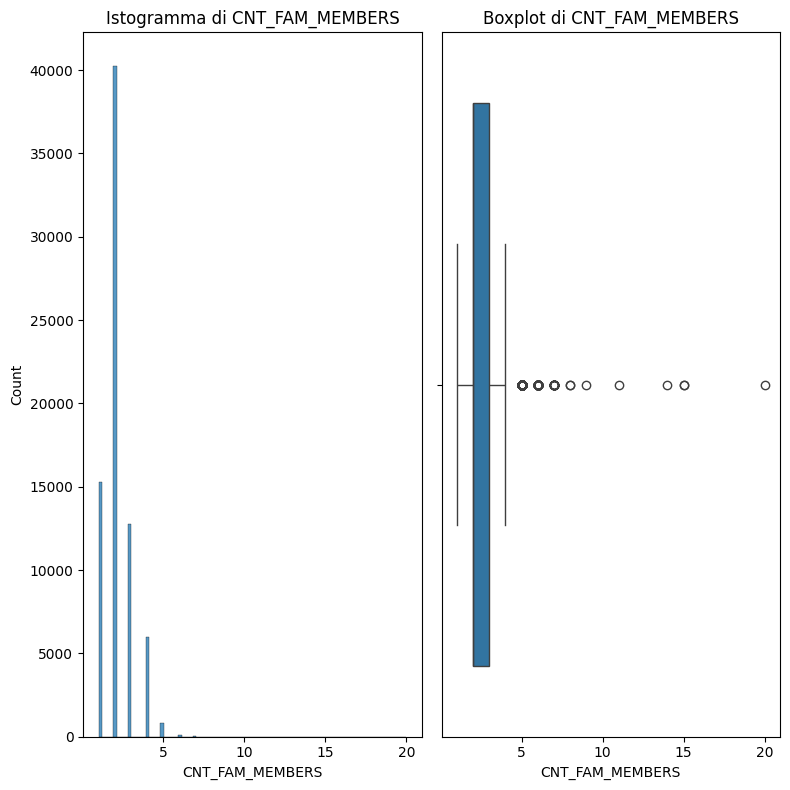

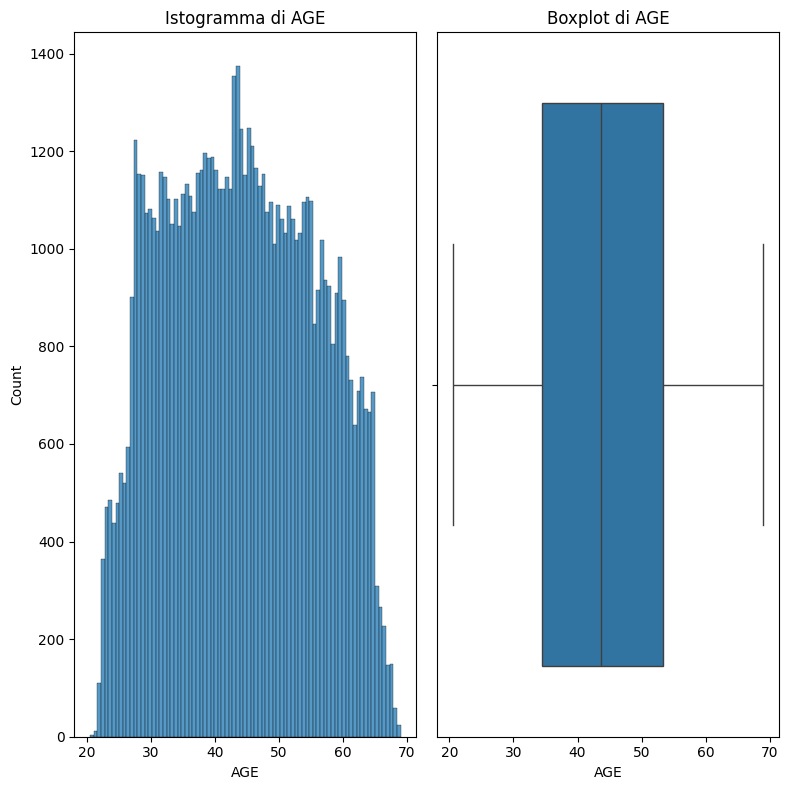

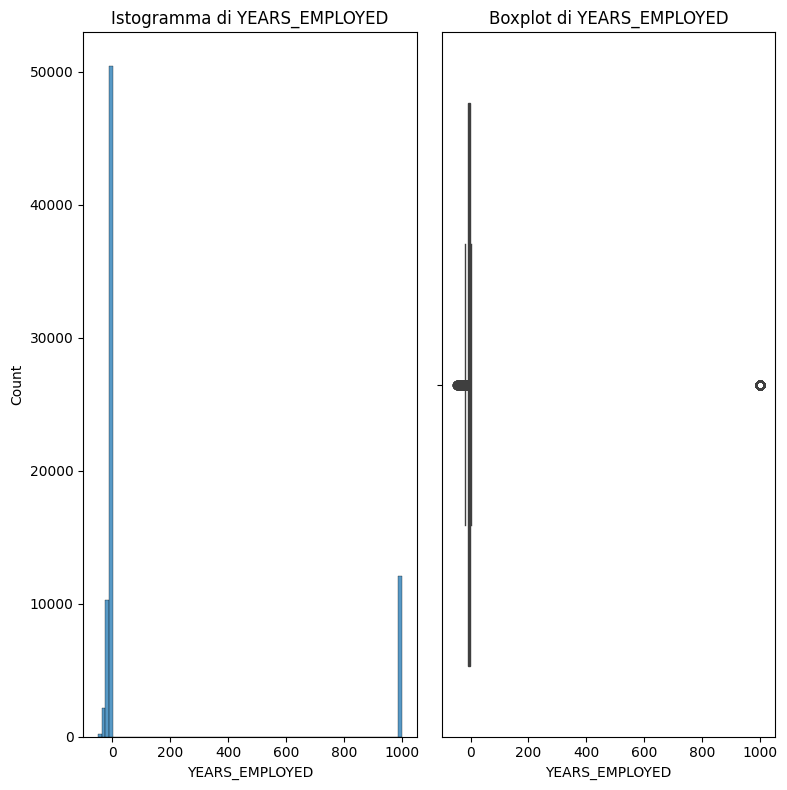

In [17]:
for column in columns_float:
  fig, axes = plt.subplots(1, 2, figsize=(8, 8))
  sns.histplot(data=df, x=df[column], bins = 'rice', ax=axes[0])
  axes[0].set_title(f'Istogramma di {column}')

  sns.boxplot(data=df, x=df[column],
               ax=axes[1])
  axes[1].set_title(f'Boxplot di {column}')
  plt.tight_layout()
  plt.show()

I grafici delle variabili qualitative ci danno le seguenti informazioni:

- **AMT_INCOME_TOTAL**: La distribuzione ha una coda a destra molto ampia infatti anche dal describe possiamo notare come il terzo percentile sia 225000 mentre il massimo sia 6750000.
- **CNT_FAM_MEMBERS**: La maggior parte delle famiglie dei clienti sono formate da 1-3 componenti.
- **AGE**: Questa feature ha una distribuzione fortemente platicurtica.
- **YEARS_EMPLOYED**: Questa feature merita un'approfondimento per capire cosa indica quel picco a 1000 anni di disoccupazione.

Rifaremo l'istogramma e il boxplot filtrando i dati che hanno un valore minore di 800 in modo da tagliare il picco a 1000.

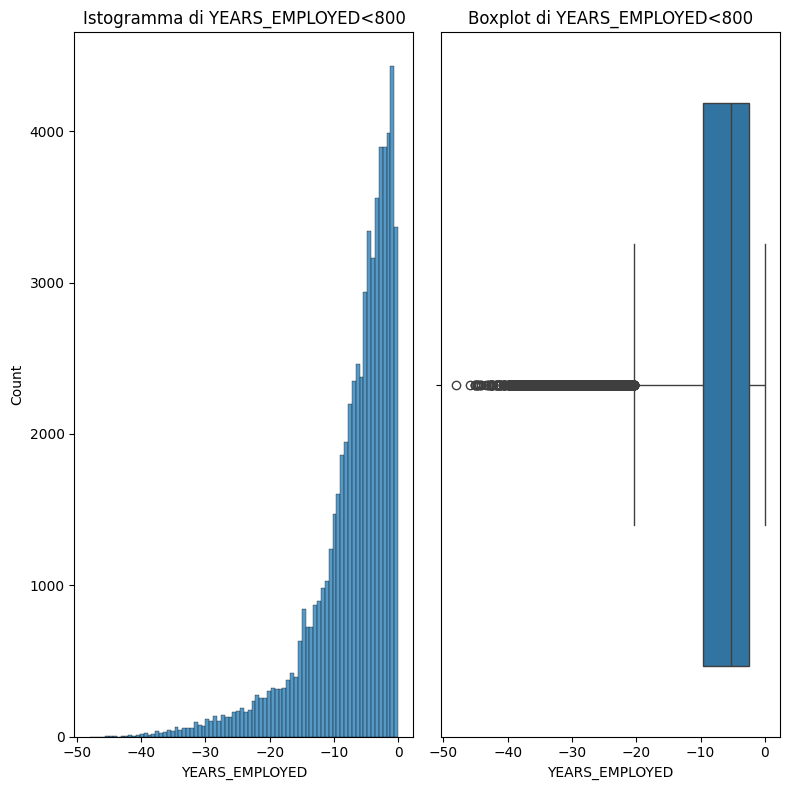

In [18]:
df_filtered = df[df['YEARS_EMPLOYED']<800]
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
sns.histplot(data=df_filtered, x='YEARS_EMPLOYED', bins = 'rice', ax=axes[0])
axes[0].set_title(f'Istogramma di YEARS_EMPLOYED<800')

sns.boxplot(data=df_filtered, x='YEARS_EMPLOYED',ax=axes[1])
axes[1].set_title(f'Boxplot di YEARS_EMPLOYED<800')
plt.tight_layout()
plt.show()

Guardando questi due grafici vediamo che non ci sono clienti disoccupati, se ci fossero si sarebbero notati in una coda a destra nell'istogramma, dove invece compare un taglio netto a zero, e come outlier a destra nel boxplot. L'istogramma della distribuzione ha un'importante coda a sinistra, possiamo quindi dire che la maggior parte dei clienti ha un'anzianità lavorativa compresa minore di 10 anni.

Appare evidente che il dato a 1000 anni sia stato usato come una flag, vediamo che tipo **NAME_INCOME_TYPE** popolano quel picco.

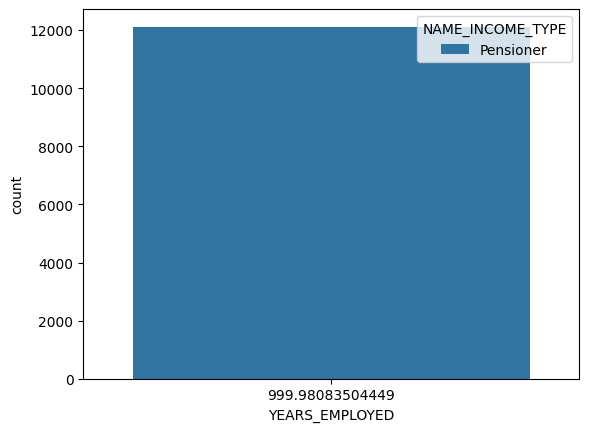

In [19]:
sns.countplot(data=df[df['YEARS_EMPLOYED']>0], x='YEARS_EMPLOYED', hue='NAME_INCOME_TYPE')
plt.show()

Sono tutti appartenenti alla categoria **PENSIONER**, quindi in realtà non ci dà informazioni aggiuntive, essendo un valore che compare quando il cliente risulta in pensione.

Questa feature ha un comportamento anomalo perché da una parte è una grandezza quantitativa, ma dall'altro il valore 1000 rappresenta una categoria di appartenza.

Effettivamente però questa variabile ha un aspetto qualitativo legato ai valori positivi e negativi, quindi posso definire una nuova feature che indica se il cliente è un lavoratore o no, in questo dataset il no implica che sia un pensionato. Estrapolata questa informazione dalla feature, cambio il valore 'flag' 1000 in 1, per favorire eventuali successive procedure di standardizzazione e/o normalizzazione.

In [20]:
df['WORKER'] = df['YEARS_EMPLOYED'].apply(lambda x: 1 if x<0 else 0)
df['YEARS_EMPLOYED'] = df['YEARS_EMPLOYED'].apply(lambda x: 1 if x>0 else x)
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET,AGE,YEARS_EMPLOYED,WORKER
ID,,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Missing,2.0,0,32.867899,-12.435318,1
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,0,58.792608,-3.104723,1
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,1,52.320329,-8.353183,1
5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,1,0,0,0,Retired,1.0,0,61.503080,1.000000,0
5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,1,Accountants,2.0,0,46.193018,-2.105407,1


Vediamo la distribuzione di **WORKER**

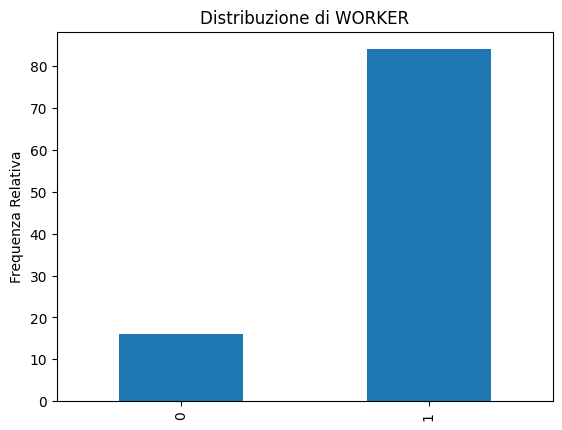

In [21]:
counts_per = (df['WORKER'].value_counts().sort_index()/num_entries)*100
counts_per.plot(kind='bar')
plt.title(f'Distribuzione di WORKER')
plt.xlabel('')
plt.ylabel('Frequenza Relativa')
plt.show()

Più dell'80% del dataset è formato da lavoratori.

## 1.3 Analisi Multivariata per feature quantitative

Studio delle relazioni delle feature tra di loro e con il target.

Analizziamo prima le feature quantitative continue per cercare eventuali correlazioni:

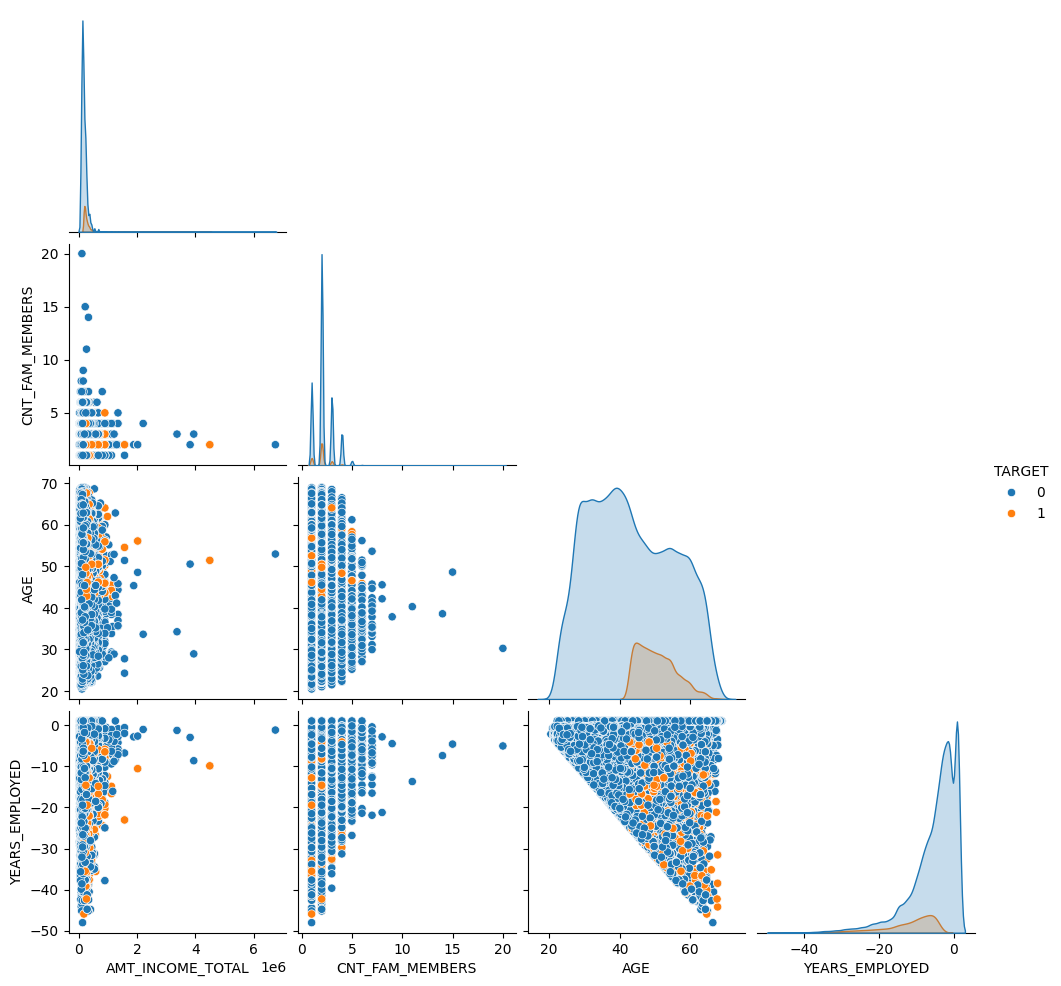

In [22]:
df_cont = df[columns_float+['TARGET']]
sns.pairplot(df_cont, hue='TARGET', corner=True)

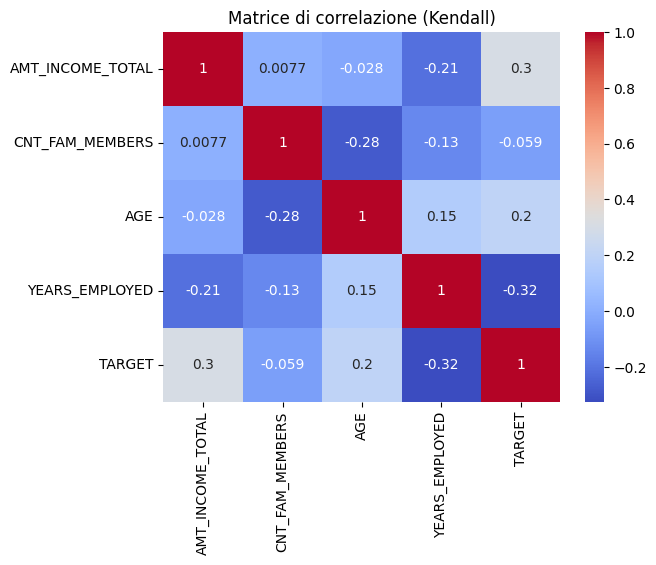

In [23]:
correlation_matrix = df_cont.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice di correlazione (Kendall)")
plt.show()

Questi grafici e la matrice di correlazione ci mostrano che c'è una debole correlazione tra alcune feature ma non tale da far presupporre eventuali problemi di collinearità. **YEARS_EMPLOYED** e **AMT_INCOME_TOTAL** sono quelle che mostrano una maggior relazione con la variabile  **TARGET**.

Verifichiamo se i boxplot di queste variabili mostrano una dipendenza dal target.

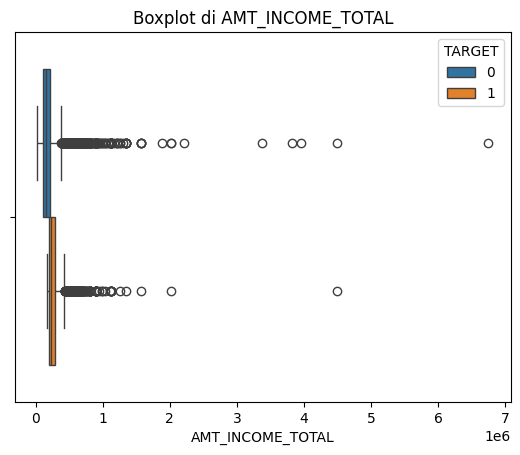

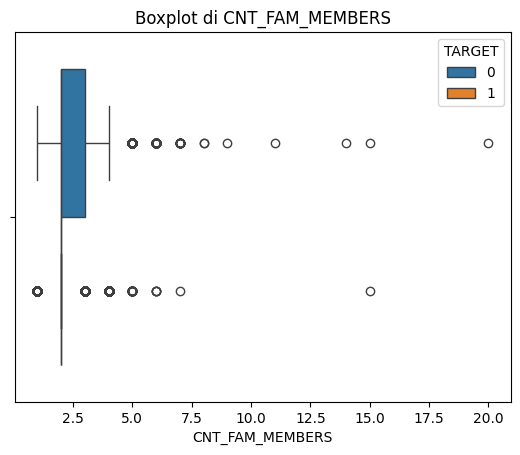

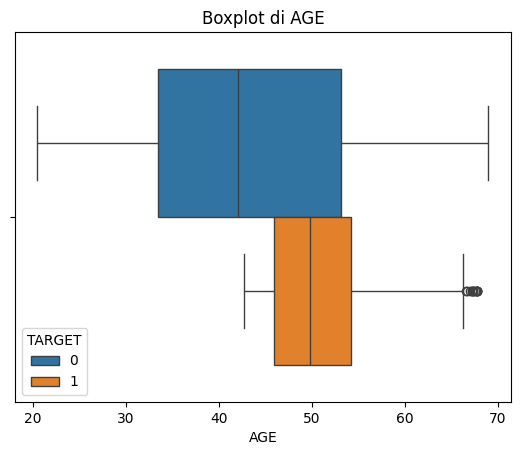

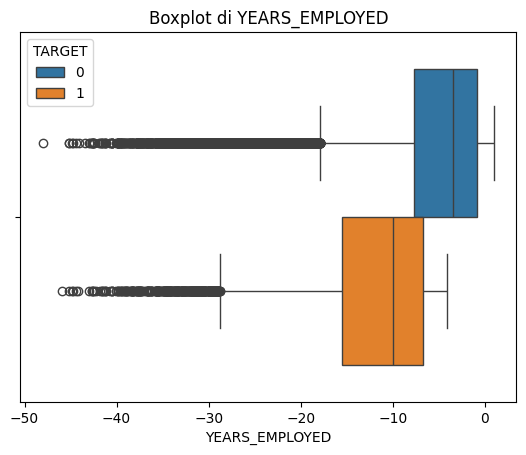

In [24]:
for column in columns_float:
  sns.boxplot(data=df, x=df[column], hue='TARGET')
  plt.title(f'Boxplot di {column}')
  plt.show()

### 1.3.A Test statistici su feature quantitative

I quattro boxplot sembrerebbero mostrare una dipendenza dalla variabile target. Dobbiamo verificare se queste differenze sono statisticamente significative.

Usiamo il Mann-Whitney U test in quanto le distribuzioni non verificano l'ipotesi di normalità, quindi un t-test potrebbe dare risultati non adeguati. In questo test l'ipotesi H0 è che i due campioni provengano dalla stessa distribuzione.

In [25]:
from scipy.stats import mannwhitneyu

for col in columns_float:

  group1 = df[df['TARGET'] == 0][col]
  group2 = df[df['TARGET'] == 1][col]

# Mann-Whitney U Test
  stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
  print(f"{col}: Mann-Whitney U Test: p-value = {p_value}")

  if p_value < 0.05:
      print(f"{col} dipende significativamente da TARGET.\n")
  else:
      print(f"Non c'è evidenza che {col} dipenda da TARGET.\n")

AMT_INCOME_TOTAL: Mann-Whitney U Test: p-value = 0.0
AMT_INCOME_TOTAL dipende significativamente da TARGET.

CNT_FAM_MEMBERS: Mann-Whitney U Test: p-value = 5.435756640117002e-59
CNT_FAM_MEMBERS dipende significativamente da TARGET.

AGE: Mann-Whitney U Test: p-value = 0.0
AGE dipende significativamente da TARGET.

YEARS_EMPLOYED: Mann-Whitney U Test: p-value = 0.0
YEARS_EMPLOYED dipende significativamente da TARGET.



Il risultato del test conferma che c'è una dipendenza da **TARGET** per tutte le feature considerate, questo vuol dire che mediamente colui che ha un'ottima affidabilità creditizia ha un reddito più alto, un nucleo familiare con un minor numero di componenti, è più grandel'età e lavora da più anni.

## 1.4 Analisi Multivariata per feature qualitative

Per rappresentare il legame con il target di ogni singola classe usiamo il barplot con le barre normalizzate a uno.

In [26]:
columns_obj_int = columns_obj_int + ['WORKER']
columns_obj_int.remove('TARGET')

<Figure size 1000x1000 with 0 Axes>

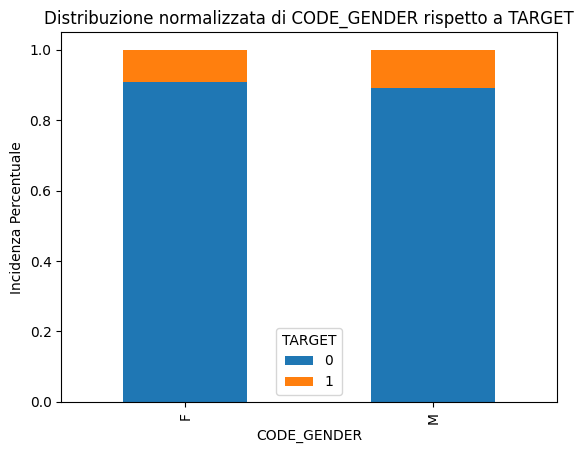

<Figure size 1000x1000 with 0 Axes>

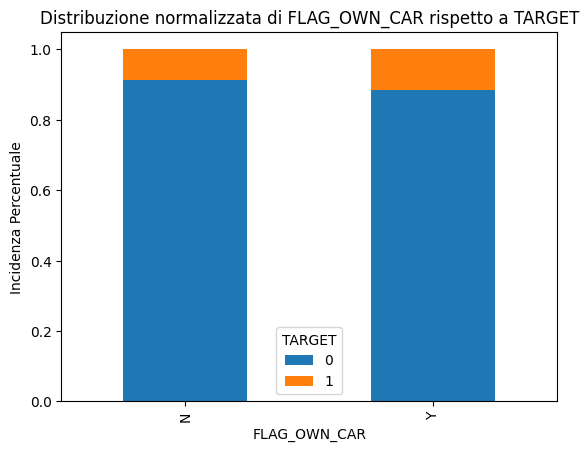

<Figure size 1000x1000 with 0 Axes>

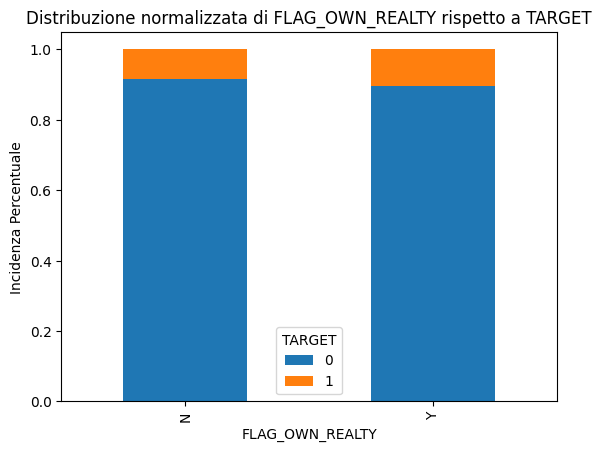

<Figure size 1000x1000 with 0 Axes>

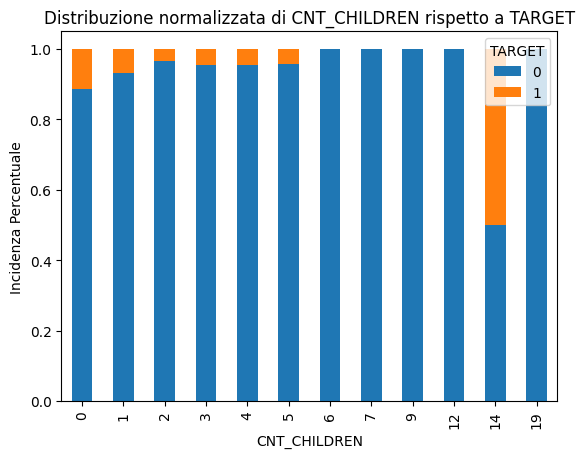

<Figure size 1000x1000 with 0 Axes>

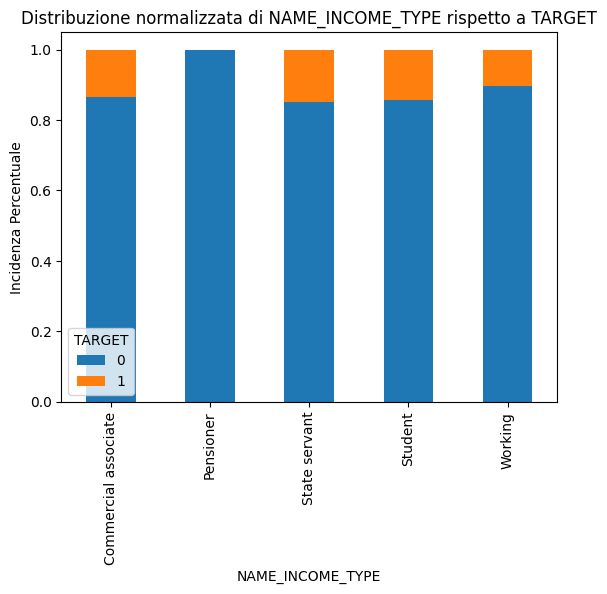

<Figure size 1000x1000 with 0 Axes>

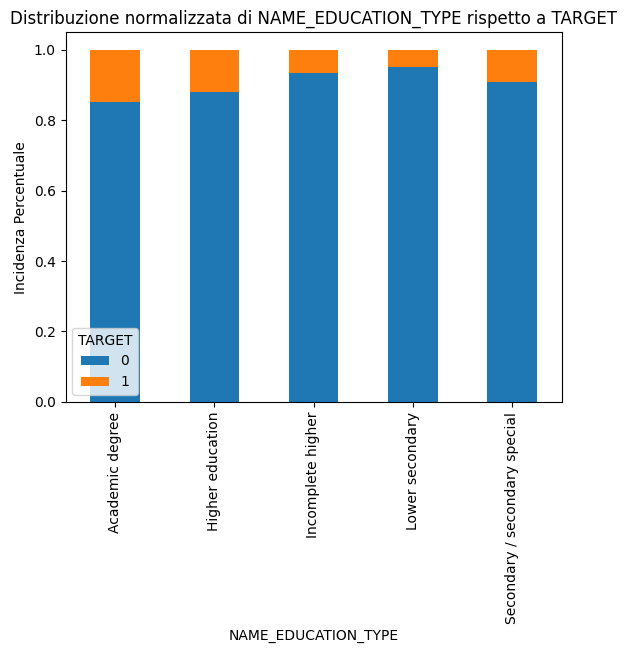

<Figure size 1000x1000 with 0 Axes>

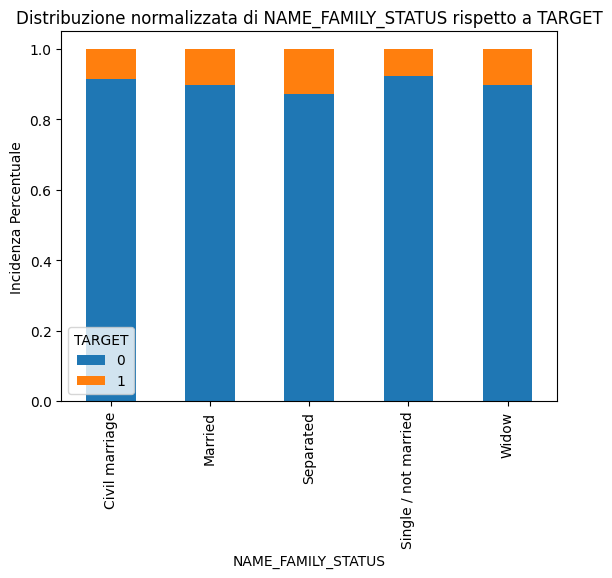

<Figure size 1000x1000 with 0 Axes>

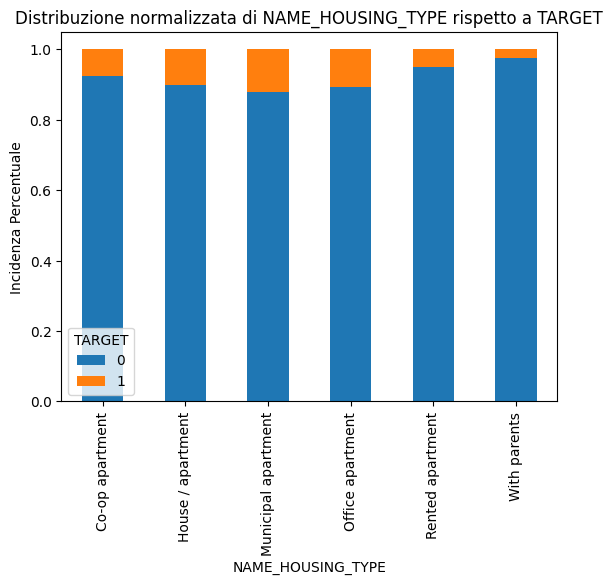

<Figure size 1000x1000 with 0 Axes>

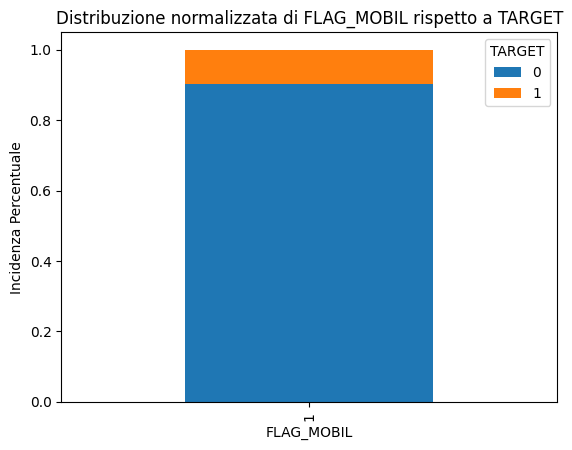

<Figure size 1000x1000 with 0 Axes>

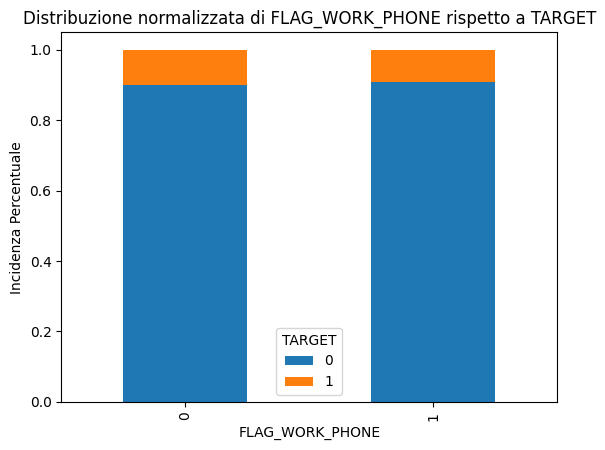

<Figure size 1000x1000 with 0 Axes>

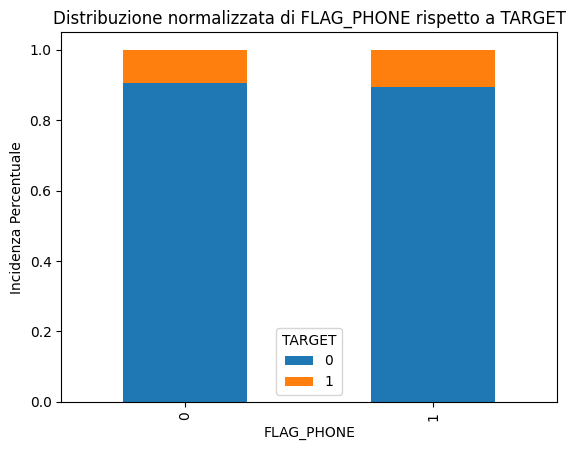

<Figure size 1000x1000 with 0 Axes>

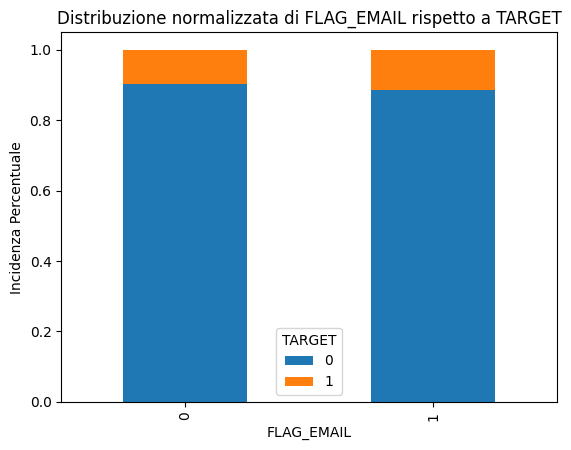

<Figure size 1000x1000 with 0 Axes>

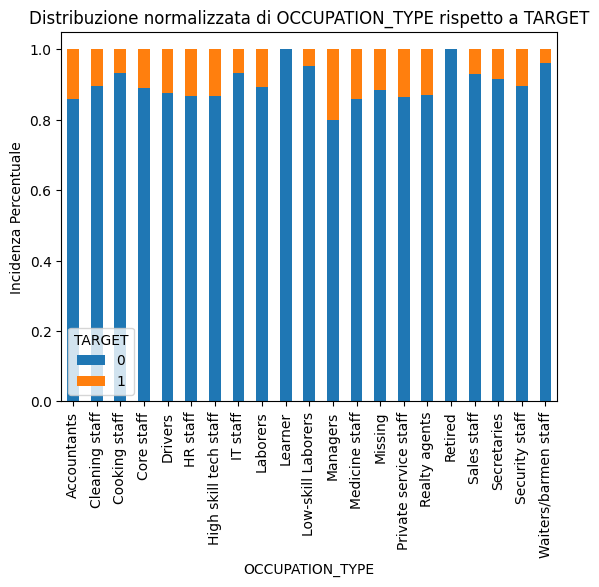

<Figure size 1000x1000 with 0 Axes>

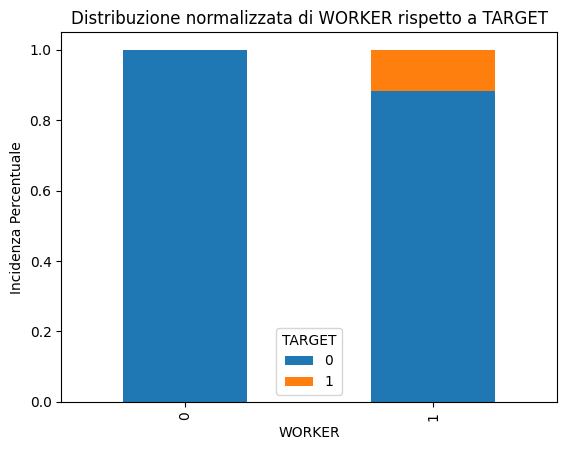

In [27]:
for col in columns_obj_int:
    plt.figure(figsize=(10, 10))

    # Crea la tabella di contingenza tra la colonna categoriale e TARGET
    contingency_table = pd.crosstab(df[col], df['TARGET'])

    # Normalizza per riga (dividendo per la somma di ogni riga)
    contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)

    # Plot dello stacked bar chart
    bars = contingency_table_normalized.plot(kind='bar', stacked=True)
    plt.title(f'Distribuzione normalizzata di {col} rispetto a TARGET')
    plt.xlabel(col)
    plt.ylabel('Incidenza Percentuale')
    plt.legend(title='TARGET')
    plt.show()


Questi grafici sono molto interessanti perché ci mostrano come tutte le classi sono popolate e in tutte le classi sono presenti clienti che hanno accettato la proposta.

Abbiamo un'unica eccezione che è **FLAG_MOBIL**, poiché il 100% dei clienti ha un cellulare questa feature non contiene alcuna informazione in quanto è pari a 1 per tutti i clienti presenti nel dataset.

Inoltre possiamo notare che il 100% dei pensionati che nel nostro dataset coincidono con i **No WORKER**, è segnalato con una non buona affidabilità creditizia, da questo punto di vista questa feature mostra un'interessante proprietà predittiva.

### 1.4.A Test statistici su feature qualitative

Anche in questo caso svolgiamo dei test statistici (chi-quadro) per verificare quanto osservato dai nostri istogrammi.

In [28]:
from scipy.stats import chi2_contingency

for col in columns_obj_int:
    contingency_table = pd.crosstab(df[col], df['TARGET'])

    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Feature: {col}")
    print(f"p-value: {p_value:}")

    if p_value < 0.05:
        print(f"\n Esiste un'associazione significativa tra '{col}' e 'TARGET' (p < 0.05).")
    else:
        print(f"\n Non c'è evidenza di un'associazione significativa tra '{col}' e 'TARGET' (p >= 0.05).")
    print("-" * 50)

Feature: CODE_GENDER
p-value: 1.3844078830694745e-11

 Esiste un'associazione significativa tra 'CODE_GENDER' e 'TARGET' (p < 0.05).
--------------------------------------------------
Feature: FLAG_OWN_CAR
p-value: 1.7073628645261294e-39

 Esiste un'associazione significativa tra 'FLAG_OWN_CAR' e 'TARGET' (p < 0.05).
--------------------------------------------------
Feature: FLAG_OWN_REALTY
p-value: 6.481254073059015e-19

 Esiste un'associazione significativa tra 'FLAG_OWN_REALTY' e 'TARGET' (p < 0.05).
--------------------------------------------------
Feature: CNT_CHILDREN
p-value: 1.6157260119378241e-125

 Esiste un'associazione significativa tra 'CNT_CHILDREN' e 'TARGET' (p < 0.05).
--------------------------------------------------
Feature: NAME_INCOME_TYPE
p-value: 0.0

 Esiste un'associazione significativa tra 'NAME_INCOME_TYPE' e 'TARGET' (p < 0.05).
--------------------------------------------------
Feature: NAME_EDUCATION_TYPE
p-value: 2.5362558665301395e-34

 Esiste un'asso

Il test del chi-quadro ci restituisce che le feature considerate hanno un'associazione significativa con **TARGET**. Eccezion fatta per **FLAG_MOBIL** che quindi può essere eliminata dal nostro dataset.

Questa fase di analisi descrittiva ci ha permesso di osservare come tutte le nostre features sono portatrici d'informazione esclusa **FLAG_MOBIL** il cui test del chi_quadro non ci ha fatto rigettare l'ipotesi nulla.

Inoltre siamo stati in grado di rivelare il comportamento anomalo di **YEARS_EMPLOYED** che ha portato alla definizione di un'altra feature che è **WORKER**. Abbiamo anche scoperto che nel nostro dataset gli unici non lavoratori sono clienti in pensioni, per il resto non ci sono altri disoccupati.

In [29]:
df = df.drop(columns=['FLAG_MOBIL'])
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET,AGE,YEARS_EMPLOYED,WORKER
ID,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Missing,2.0,0,32.867899,-12.435318,1
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,58.792608,-3.104723,1
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,1,52.320329,-8.353183,1
5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Retired,1.0,0,61.503080,1.000000,0
5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,46.193018,-2.105407,1


# 2 Costruzione del modello predittivo

## 2.1 Preprocessing: Mapping, OHE, splitting del dataset

In [30]:
def get_feature_names(ct, df):
    feature_names = []
    for name, transformer, columns in ct.transformers_:
        if isinstance(transformer, OneHotEncoder):  # Se è OneHotEncoder, prende le categorie
            for col, categories in zip(columns, transformer.categories_):
                feature_names.extend([f"{col}_{cat}" for cat in categories])
        elif isinstance(transformer, FunctionTransformer):  # Se è FunctionTransformer, prende il nome originale
            feature_names.extend(columns)
        else:  # Altrimenti, prende direttamente il nome delle colonne trasformate
            feature_names.extend(columns)

    return feature_names


In [31]:
# Creiamo il ColumnTransformer
ct = ColumnTransformer([
    ("gender", FunctionTransformer(lambda x: (x == 'M').astype(int)), ['CODE_GENDER']),
    ("car", FunctionTransformer(lambda x: (x == 'Y').astype(int)), ['FLAG_OWN_CAR']),
    ("realty", FunctionTransformer(lambda x: (x == 'Y').astype(int)), ['FLAG_OWN_REALTY']),
    ("income", OneHotEncoder(), ['NAME_INCOME_TYPE']),
    ("education", OneHotEncoder(), ['NAME_EDUCATION_TYPE']),
    ("family", OneHotEncoder(), ['NAME_FAMILY_STATUS']),
    ("house", OneHotEncoder(), ['NAME_HOUSING_TYPE']),
    ("occupation", OneHotEncoder(), ['OCCUPATION_TYPE'])
], remainder='passthrough', force_int_remainder_cols=False)

# Trasformiamo i dati
df_transformed = ct.fit_transform(df)

# Stampa i nomi delle nuove colonne
new_columns = get_feature_names(ct, df_transformed)
print(new_columns)

['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated', 'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_Co-op apartment', 'NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_Municipal apartment', 'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents', 'OCCUPATION_TYPE_Accountants', 'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff', 'OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Drivers', 'OCCUPATION_TYPE_HR staf

In [32]:
df_transformed = pd.DataFrame(df_transformed, columns=new_columns)

# Visualizza le prime righe per conferma
df_transformed.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,...,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,TARGET,AGE,YEARS_EMPLOYED,WORKER
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,427500.0,1.0,0.0,0.0,2.0,0.0,32.867899,-12.435318,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,112500.0,0.0,0.0,0.0,2.0,0.0,58.792608,-3.104723,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,270000.0,0.0,1.0,1.0,1.0,1.0,52.320329,-8.353183,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,283500.0,0.0,0.0,0.0,1.0,0.0,61.503080,1.000000,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,270000.0,1.0,1.0,1.0,2.0,0.0,46.193018,-2.105407,1.0


In [33]:
#Non uso il .values perché in questo modo mantengo il nome delle feature, il che mi
#aiuterà nell'interpretazione del modello.
RANDOM_SEED = 42

X = df_transformed.drop(['TARGET'], axis=1)
y = df_transformed["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=.3, random_state=RANDOM_SEED)
print(X_train.shape)
print(X_test.shape)

(52679, 54)
(22577, 54)


Verifichiamo che X_train e X_test siano campioni rappresentativi del dataset, cioè che abbiano le stesse caratteristiche, per questo scopo usiamo il test di Kolmogorov-Smirnov:

In [34]:
from scipy.stats import ks_2samp

#Per poter eseguire il test devo lavorare con array numpy
X_np = X.to_numpy()
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
stat, p_value = ks_2samp(X_train_np.flatten(), X_np.flatten())

print("Verifica distribuzione per X_train")
print(f"Statistiche K-S: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rifiutiamo l'ipotesi nulla: le distribuzioni sono diverse.\n")
else:
    print("Non rifiutiamo l'ipotesi nulla: le distribuzioni sono uguali.\n")


stat, p_value = ks_2samp(X_test_np.flatten(), X_np.flatten())
print("\nVerifica distribuzione per X_test")
print(f"Statistiche K-S: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rifiutiamo l'ipotesi nulla: le distribuzioni sono diverse.\n")
else:
    print("Non rifiutiamo l'ipotesi nulla: le distribuzioni sono uguali.\n")

Verifica distribuzione per X_train
Statistiche K-S: 0.0001
P-value: 1.0000
Non rifiutiamo l'ipotesi nulla: le distribuzioni sono uguali.


Verifica distribuzione per X_test
Statistiche K-S: 0.0001
P-value: 1.0000
Non rifiutiamo l'ipotesi nulla: le distribuzioni sono uguali.



Abbiamo verificato che X_train e X_test sono due campioni coerenti con il dataset originale.

## 2.2 Costruzione del modello predittivo: Decision Tree

La descrizione del progetto sottolinea l'importanza che il team riceva un modello che restituisca delle informazioni facilmente interpretabili. Tra i vari modelli per studiare un problema di classificazione i Decision Tree spiccano per la capacità di restituire anche una rappresentazione grafica del processo decisionale.

Per poter avere un modello di riferimneto, prima di fare features selection e fine tuning degli iperparametri costruiamo un DT base e valutiamo le sue performance questo servirà da baseline.

### 2.2.A DT: Baseline Model

In [39]:
class DecisionTreePipeline:
  """
  This Class defines the operations that can be done to create and analyze the
  ML model, this Class is specific for Decision Tree Regression.
  """
  def __init__(self, max_depth = None, min_samples_split = 2, min_samples_leaf = 1, ccp_alpha = 0.0, class_weight = None):
    """
      Initialize the DecisionTreePipeline instance.

      Methods:
      - fit(self, data, model=None)
      - predict(self, X, model=None)
      - evaluate_metrics(self, data_train, data_test = None, model = None)
      - cross_validation(self, data)
      - create_report(self, data)
      - plot_confusion_matrix(self, data, labels=["Negative", "Positive"], show_precisione_recall=False)


      Arguments:
      - max_depth (int): maximum number of levels.
      - min_samples_split (int): minimum number of samples required to split an internal node.
      - min_samples_leaf (int): minimum number of samples required in a leaf node
      - ccp_alpha (float): controls the pruning
      - class_weight (str): two values: None or 'balanced' for unbalanced dataset.
      """
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.min_samples_leaf = min_samples_leaf
    self.ccp_alpha = ccp_alpha
    self.class_weight = class_weight
    self.report = {}
    self.model = DecisionTreeClassifier(max_depth = self.max_depth,
                                        min_samples_split = self.min_samples_split,
                                        min_samples_leaf = self.min_samples_leaf,
                                        ccp_alpha = self.ccp_alpha,
                                        class_weight = self.class_weight)

  def fit(self, data, model=None):
    '''
    If model=None use the class model to do the fit, otherwise use
    the one passed with the function call.

    Arguments:
    - X(ndarray): it contains the values of the features.
    - y(ndarray): it contains the values of the target.
    - model: LogisticRegression model
    '''
    X, y = data
    if model is None:
        model = self.model

    model.fit(X, y)

  def predict(self, X, model=None):
    '''
    If model=None use the class model to do calculate the probabilities, otherwise use
    the one passed with the function call. It returns the values of the probability
    for each sample.

    Arguments:
    - X(ndarray): it contains the values of the features.
    - model: LogisticRegression model
    '''
    if model is None:
        model = self.model

    return model.predict(X)


  def evaluate_metrics(self, data_train, data_test = None, model = None):
    '''
    This function allows the calculation of metrics (F1, Precision and Recall)
    for both the training and test datasets. If no
    the threshold and model values, those already saved in the
    class.

    Arguments:
    - X_train (ndarray): it contains the values of the features (train dataset).
    - y_train (ndarray): it contains the values of the target (train dataset).
    - X_test (ndarray): it contains the values of the features (test dataset).
    - y_test (ndarray): it contains the values of the target (test dataset).
    - threshold (float): the value to decide the class of the sample.
    - model: LogisticRegression model
    '''
    X_train, y_train = data_train
    if model is None:
        model = self.model

    y_pred_train = self.predict(X_train, model)
    metrics = {}
    metrics['train'] = {
        'precision': round(precision_score(y_train, y_pred_train, zero_division=0),2),
        'recall': round(recall_score(y_train, y_pred_train, zero_division=0),2),
        'f1': round(f1_score(y_train, y_pred_train, zero_division=0),2)
    }
    if data_test is not None:

      X_test, y_test = data_test
      y_pred_test = self.predict(X_test, model)
      metrics['test'] = {
          'precision': round(precision_score(y_test, y_pred_test, zero_division=0),2),
          'recall': round(recall_score(y_test, y_pred_test, zero_division=0),2),
          'f1': round(f1_score(y_test, y_pred_test, zero_division=0),2)
     }

    return metrics

  def cross_validation(self, data):
    '''
    This function performs cross validation, which is used to understand whether our
    model suffers from overfitting. It prints the average values of the metrics with their
    standard deviation.

    Arguemnts:
    - X_train (ndarray): it contains the values of the features.
    - y_train (ndarray): it contains the values of the target.
    - threshold (float): the value to decide the class of the sample.
    '''

    X_train, y_train = data
    metrics = []

    kf = KFold(n_splits=5, shuffle=True, random_state = RANDOM_SEED)  # Modifica il random_state se necessario
    model_copy = clone(self.model)

    for train_index, test_index in kf.split(X_train):
    # Split dei dati
      X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
      y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    # Modello Logistic Regression
      model_copy.fit(X_train_cv, y_train_cv)
      fold_metrics = self.evaluate_metrics( (X_train_cv, y_train_cv), (X_test_cv, y_test_cv), model_copy)
      metrics.append(fold_metrics)

    aggregated_metrics = {
    "train": {"precision": [], "recall": [], "f1": []},
    "test": {"precision": [], "recall": [], "f1": []}
    }

    # Estrai i valori per ogni metrica
    for metric_dict in metrics:
      for key in ["train", "test"]:
        for metric_name, value in metric_dict[key].items():
          aggregated_metrics[key][metric_name].append(value)

    # Calcola medie e deviazioni standard
    print("Medie e Deviazioni Standard delle Metriche:")
    for key in ["train", "test"]:
      print(f"\n{key.capitalize()} Metrics:")
      for metric_name, values in aggregated_metrics[key].items():
        mean_value = np.mean(values)
        std_value = np.std(values)
        print(f"  {metric_name}: Mean = {mean_value:.4f}, Std = {std_value:.4f}\n")


  def create_report(self, data):
    '''
    Create, print and save in reports the characteristics of the model and the results
    of the metrics calculation.

    Arguments:
    - X (ndarray): it contains the values of the features.
    - y (ndarray): it contains the values of the target.
    '''
    X, y = data
    y_pred = self.predict(X)
    self.report = classification_report(y, y_pred)
    return self.report

  def plot_confusion_matrix(self, data, labels=["Negative", "Positive"], show_precisione_recall=False):
    '''
    Plot of the confusion matrix with heatmap.

    Arguments:
    - X (ndarray): it contains the values of the features.
    - y (ndarray): it contains the values of the target.
    - labels (list): Classi del nostro modello.
    - show_precisione_recall (bool): if it is true, it prints on the matrix the values
    of precision and recall.
    '''
    X, y_true = data
    y_pred = self.predict(X)

    cm = confusion_matrix(y_true, y_pred) #tn, fp, fn, tp
    df_cm = pd.DataFrame(cm, index = labels,
                       columns = ["Predicted "+labels[0], "Predicted "+labels[1]])

    sns.heatmap(df_cm, annot=True, fmt='g')

    if show_precisione_recall:
      plt.text(0, -0.1, f"Precision: {cm[1][1]/(cm[1][1]+cm[0][1]):.3f}")
      plt.text(1, -0.1, f"Recall: {cm[1][1]/(cm[1][1]+cm[1][0]):.3f}")

    plt.show()


RISULTATI CROSS VALIDATION
Medie e Deviazioni Standard delle Metriche:

Train Metrics:
  precision: Mean = 1.0000, Std = 0.0000

  recall: Mean = 0.5980, Std = 0.0040

  f1: Mean = 0.7500, Std = 0.0000


Test Metrics:
  precision: Mean = 0.3220, Std = 0.0075

  recall: Mean = 0.2660, Std = 0.0102

  f1: Mean = 0.2900, Std = 0.0089

-----------------------------------

 REPORT METRICHE - TRAIN del modello ottimizzato con i seguenti parametri:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     47520
         1.0       1.00      0.50      0.67      5159

    accuracy                           0.95     52679
   macro avg       0.97      0.75      0.82     52679
weighted avg       0.95      0.95      0.94     52679

-----------------------------------
Confusion Matrix Train


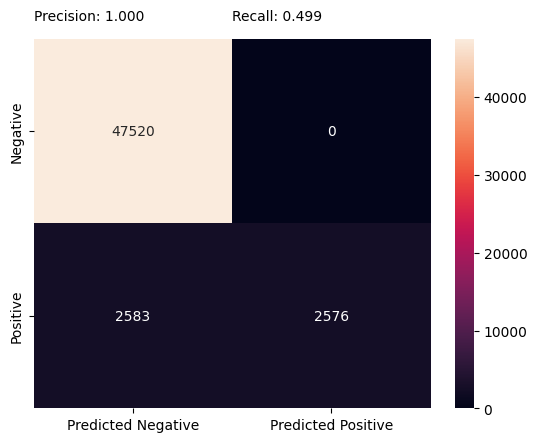

In [36]:
base_model = DecisionTreePipeline()
base_model.fit((X_train, y_train))

print('RISULTATI CROSS VALIDATION')
base_model.cross_validation((X_train, y_train))
print('-----------------------------------')

print(f'\n REPORT METRICHE - TRAIN:')
print(base_model.create_report((X_train, y_train)))

print('-----------------------------------')
print('Confusion Matrix Train')
base_model.plot_confusion_matrix((X_train, y_train), show_precisione_recall=True)


Come prevedibile il modello baseline soffre fortemente di overfitting, comunque questo sarà il punto iniziale per valutare i prossimi modelli.

### 2.2.B DT: Features Selection

                                              Feature  Importance
52                                     YEARS_EMPLOYED    0.376527
51                                                AGE    0.318913
46                                   AMT_INCOME_TOTAL    0.189447
49                                         FLAG_EMAIL    0.006767
50                                    CNT_FAM_MEMBERS    0.005635
1                                        FLAG_OWN_CAR    0.005493
2                                     FLAG_OWN_REALTY    0.005353
3               NAME_INCOME_TYPE_Commercial associate    0.005175
45                                       CNT_CHILDREN    0.004700
9                NAME_EDUCATION_TYPE_Higher education    0.004433
13                  NAME_FAMILY_STATUS_Civil marriage    0.004411
7                            NAME_INCOME_TYPE_Working    0.004379
5                      NAME_INCOME_TYPE_State servant    0.004204
41                        OCCUPATION_TYPE_Sales staff    0.004069
48        

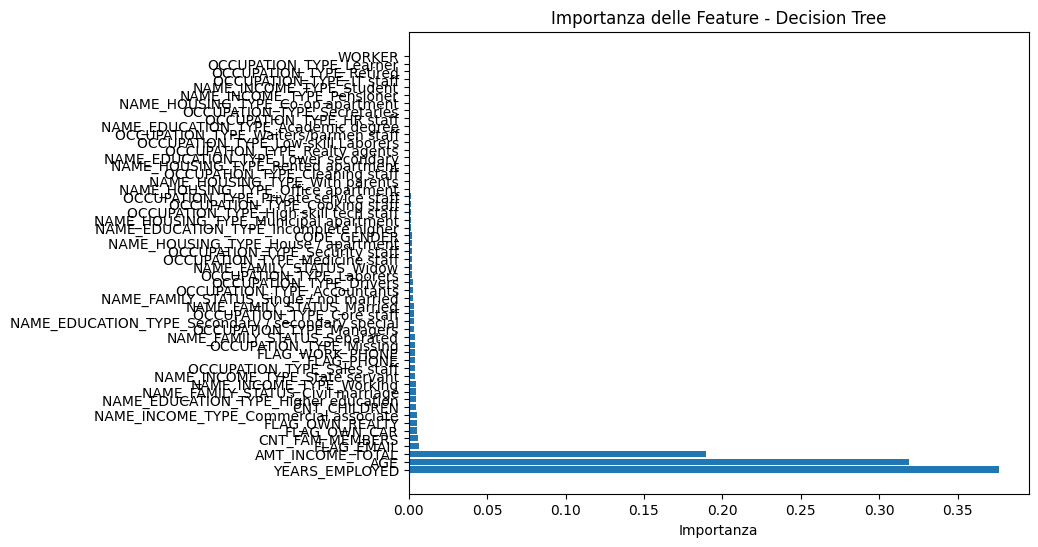

Feature selezionate: ['YEARS_EMPLOYED' 'AGE' 'AMT_INCOME_TOTAL']


In [37]:
# Ottieni l'importanza delle feature
feature_importances = base_model.model.feature_importances_

# Crea un DataFrame per visualizzare le importanze
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordina per importanza
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Visualizza le feature importanti
print(importances_df)

# Plot delle importanze delle feature
plt.figure(figsize=(8, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importanza')
plt.title('Importanza delle Feature - Decision Tree')
plt.show()

# Seleziona le feature con importanza maggiore di una certa soglia (ad esempio 0.2)
selected_features = importances_df[importances_df['Importance'] > 0.1]['Feature']
print(f"Feature selezionate: {selected_features.values}")



### 2.2.C DT: BM con features selection

RISULTATI CROSS VALIDATION
Medie e Deviazioni Standard delle Metriche:

Train Metrics:
  precision: Mean = 1.0000, Std = 0.0000

  recall: Mean = 0.5980, Std = 0.0040

  f1: Mean = 0.7500, Std = 0.0000


Test Metrics:
  precision: Mean = 0.3160, Std = 0.0049

  recall: Mean = 0.2580, Std = 0.0075

  f1: Mean = 0.2840, Std = 0.0049

-----------------------------------

 REPORT METRICHE - TRAIN del modello ottimizzato con i seguenti parametri:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     47520
         1.0       1.00      0.50      0.67      5159

    accuracy                           0.95     52679
   macro avg       0.97      0.75      0.82     52679
weighted avg       0.95      0.95      0.94     52679

-----------------------------------
Confusion Matrix Train


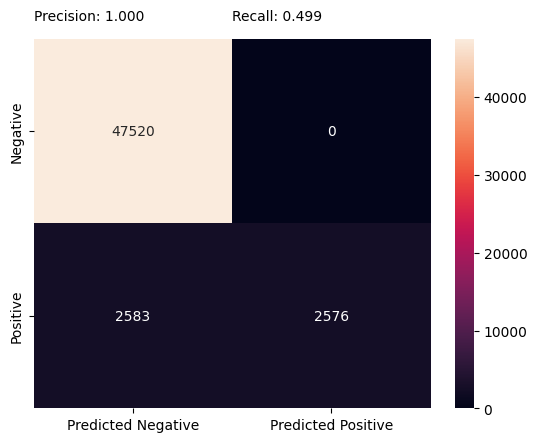

In [41]:
X_train_sf = X_train[selected_features]
model1 = DecisionTreePipeline()
model1.fit((X_train_sf, y_train))

print('RISULTATI CROSS VALIDATION')
model1.cross_validation((X_train_sf, y_train))
print('-----------------------------------')

print(f'\n REPORT METRICHE - TRAIN:')
print(model1.create_report((X_train_sf, y_train)))

print('-----------------------------------')
print('Confusion Matrix Train')
model1.plot_confusion_matrix((X_train_sf, y_train), show_precisione_recall=True)


Possiamo osservare che il modello 1 ha gli stessi problemi di overfitting del modello base, a testimonianza che le feature eliminando non davano alcun contributo al modello stesso.

### 2.2.D DT: BM con classweight = 'balanced'

Questo parametro dovrebbe aiutare a tenere conto dello sbilanciamento del dataset.

RISULTATI CROSS VALIDATION
Medie e Deviazioni Standard delle Metriche:

Train Metrics:
  precision: Mean = 0.7140, Std = 0.0049

  recall: Mean = 1.0000, Std = 0.0000

  f1: Mean = 0.8300, Std = 0.0000


Test Metrics:
  precision: Mean = 0.3900, Std = 0.0063

  recall: Mean = 0.4180, Std = 0.0040

  f1: Mean = 0.4020, Std = 0.0040

-----------------------------------

 REPORT METRICHE - TRAIN:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     47520
         1.0       0.67      1.00      0.80      5159

    accuracy                           0.95     52679
   macro avg       0.83      0.97      0.89     52679
weighted avg       0.97      0.95      0.96     52679

-----------------------------------
Confusion Matrix Train


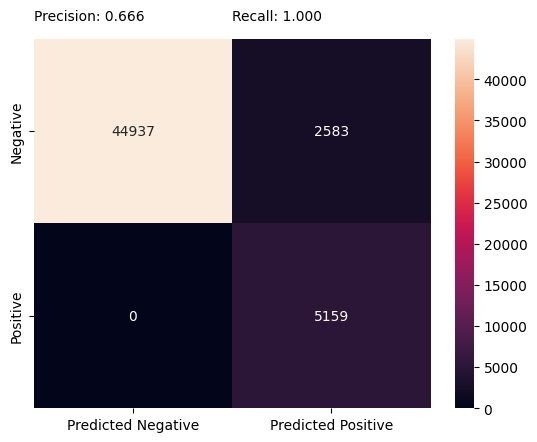

In [43]:
model2 = DecisionTreePipeline(class_weight='balanced')
model2.fit((X_train_sf, y_train))

print('RISULTATI CROSS VALIDATION')
model2.cross_validation((X_train_sf, y_train))
print('-----------------------------------')

print(f'\n REPORT METRICHE - TRAIN:')
print(model2.create_report((X_train_sf, y_train)))

print('-----------------------------------')
print('Confusion Matrix Train')
model2.plot_confusion_matrix((X_train_sf, y_train), show_precisione_recall=True)

Introducendo il class_weight = 'balanced' abbiamo migliorato la classificazione dei positivi ma abbiamo adesso dei falsi positivi, procediamo con il finetuning dei parametri

## 2.3 Fine Tuning dei parametri del DT

In [45]:
from sklearn.model_selection import GridSearchCV

# Crea un oggetto DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Definisci la griglia dei parametri
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1]
}

# Esegui GridSearchCV per cercare la combinazione ottimale di parametri
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_sf, y_train)

# Ottieni i migliori parametri
print("Migliori parametri trovati:")
print(grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Migliori parametri trovati:
{'ccp_alpha': 0.001, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


RISULTATI CROSS VALIDATION
Medie e Deviazioni Standard delle Metriche:

Train Metrics:
  precision: Mean = 0.5640, Std = 0.0049

  recall: Mean = 1.0000, Std = 0.0000

  f1: Mean = 0.7200, Std = 0.0000


Test Metrics:
  precision: Mean = 0.5640, Std = 0.0102

  recall: Mean = 1.0000, Std = 0.0000

  f1: Mean = 0.7220, Std = 0.0075

-----------------------------------

 REPORT METRICHE - TRAIN:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     47520
         1.0       0.56      1.00      0.72      5159

    accuracy                           0.92     52679
   macro avg       0.78      0.96      0.84     52679
weighted avg       0.96      0.92      0.93     52679

-----------------------------------
Confusion Matrix Train


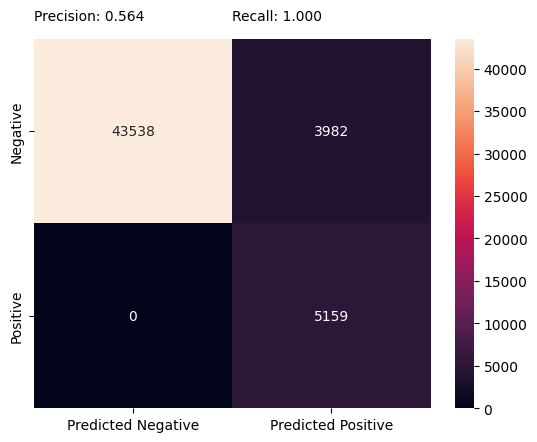

In [46]:
max_depth = grid_search.best_params_['max_depth']
min_samples_split = grid_search.best_params_['min_samples_split']
min_samples_leaf = grid_search.best_params_['min_samples_leaf']
ccp_alpha = grid_search.best_params_['ccp_alpha']
best_dt = DecisionTreePipeline(max_depth, min_samples_split, min_samples_leaf, ccp_alpha)
best_dt.fit((X_train_sf, y_train))

print('RISULTATI CROSS VALIDATION')
best_dt.cross_validation((X_train_sf, y_train))
print('-----------------------------------')

print(f'\n REPORT METRICHE - TRAIN:')
print(best_dt.create_report((X_train_sf, y_train)))

print('-----------------------------------')
print('Confusion Matrix Train')
best_dt.plot_confusion_matrix((X_train_sf, y_train), show_precisione_recall=True)


Con il fine tuning siamo riusciti a migliorare il problema dell'overfitting, prima di scegliere il modello facciamo un altro tentativo di finetunig usando l'attributo class_weigth = 'balanced'

In [48]:
# Crea un oggetto DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Definisci la griglia dei parametri
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1]
}

# Esegui GridSearchCV per cercare la combinazione ottimale di parametri
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_sf, y_train)

# Ottieni i migliori parametri
print("Migliori parametri trovati:")
print(grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Migliori parametri trovati:
{'ccp_alpha': 0.001, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


L'attributo class_weight non ha influito sui parametri migliori, vediamo se influisce sulle prestazioni del modello.

RISULTATI CROSS VALIDATION
Medie e Deviazioni Standard delle Metriche:

Train Metrics:
  precision: Mean = 0.5640, Std = 0.0049

  recall: Mean = 1.0000, Std = 0.0000

  f1: Mean = 0.7200, Std = 0.0000


Test Metrics:
  precision: Mean = 0.5640, Std = 0.0102

  recall: Mean = 1.0000, Std = 0.0000

  f1: Mean = 0.7220, Std = 0.0075

-----------------------------------

 REPORT METRICHE - TRAIN:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     47520
         1.0       0.56      1.00      0.72      5159

    accuracy                           0.92     52679
   macro avg       0.78      0.96      0.84     52679
weighted avg       0.96      0.92      0.93     52679

-----------------------------------
Confusion Matrix Train


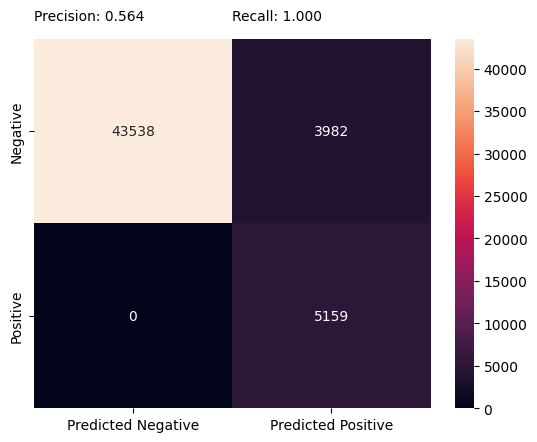

In [50]:
max_depth = grid_search.best_params_['max_depth']
min_samples_split = grid_search.best_params_['min_samples_split']
min_samples_leaf = grid_search.best_params_['min_samples_leaf']
ccp_alpha = grid_search.best_params_['ccp_alpha']
best_dt2 = DecisionTreePipeline(max_depth, min_samples_split, min_samples_leaf, ccp_alpha, class_weight = 'balanced')
best_dt2.fit((X_train_sf, y_train))

print('RISULTATI CROSS VALIDATION')
best_dt2.cross_validation((X_train_sf, y_train))
print('-----------------------------------')

print(f'\n REPORT METRICHE - TRAIN:')
print(best_dt2.create_report((X_train_sf, y_train)))

print('-----------------------------------')
print('Confusion Matrix Train')
best_dt2.plot_confusion_matrix((X_train_sf, y_train), show_precisione_recall=True)


Le prestazioni sono assolutamente identiche, vediamo se mostrano differenze quando applicati sui dati di test.


 REPORT METRICHE - TEST:
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95     20366
         1.0       0.56      1.00      0.72      2211

    accuracy                           0.92     22577
   macro avg       0.78      0.96      0.84     22577
weighted avg       0.96      0.92      0.93     22577

Confusion Matrix Train


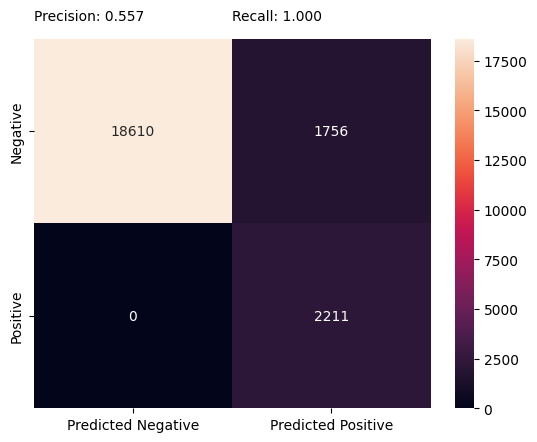

-----------------------------------

 REPORT METRICHE - TEST (class_weight = 'balanced'):
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95     20366
         1.0       0.56      1.00      0.72      2211

    accuracy                           0.92     22577
   macro avg       0.78      0.96      0.84     22577
weighted avg       0.96      0.92      0.93     22577

-----------------------------------
Confusion Matrix Train


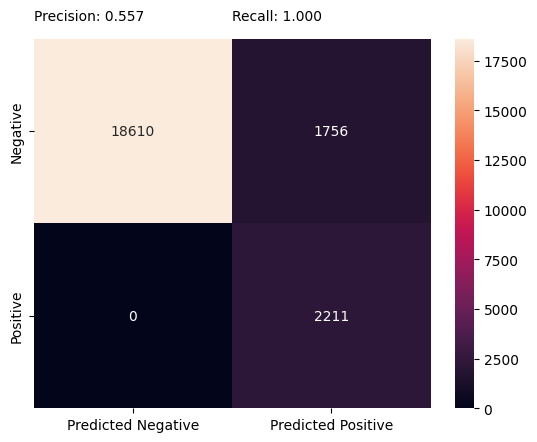

In [51]:
X_test_sf = X_test[selected_features]

print(f'\n REPORT METRICHE - TEST:')
print(best_dt.create_report((X_test_sf, y_test)))

print('Confusion Matrix Test')
best_dt.plot_confusion_matrix((X_test_sf, y_test), show_precisione_recall=True)

print('-----------------------------------')

print(f"\n REPORT METRICHE - TEST (class_weight = 'balanced'):")
print(best_dt2.create_report((X_test_sf, y_test)))

print('-----------------------------------')
print('Confusion Matrix Test')
best_dt2.plot_confusion_matrix((X_test_sf, y_test), show_precisione_recall=True)

I due modelli hanno le stesse performance anche su set di test e non mostrano overfittig, scegliamo quindi come modello migliore quello senza l'attributo class_weight = 'balanced' poiché è quello che fa meno manipolazione sui dati.

Il nostro modello riesce ad individuare correttamente 18610 veri negativi su 20366 con una Recall sulla classe 0 del 91% e un F1 - Score del 95%. Considerando anche la possibilità di spiegabilità del modello questo è un ottimo risultato.

# 3 Valutazione del modello scelto sull'intero dataset


 REPORT METRICHE:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     67886
         1.0       0.56      1.00      0.72      7370

    accuracy                           0.92     75256
   macro avg       0.78      0.96      0.84     75256
weighted avg       0.96      0.92      0.93     75256

-----------------------------------
Confusion Matrix


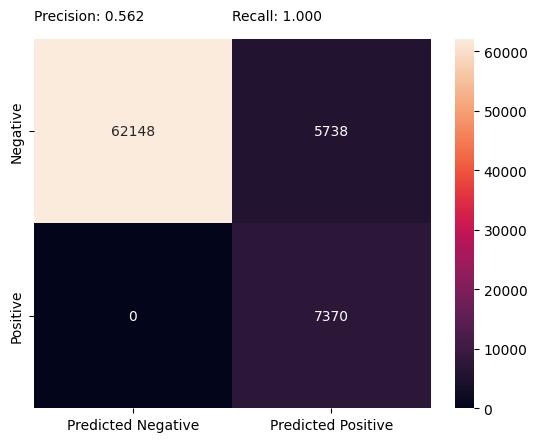

In [55]:
X_sf = X[selected_features]
print(f"\n REPORT METRICHE:")
print(best_dt.create_report((X_sf, y)))

print('-----------------------------------')
print('Confusion Matrix')
best_dt.plot_confusion_matrix((X_sf, y), show_precisione_recall=True)

Vediamo come anche sull'intero dataset il nostro modello mantiene le stesse metriche.

# 4 Commenti e interpretazione del modello

Come risultato della nostra analisi esplorative e della features selection abbiamo trovato che le tre features più significative per il nostro problema sono:

- **YEARS_EMPLOYED**: rispetto all'originale **DAYS_EMPLOYED** è stata divisa in anni anziché in giorni per avere un'informazione più chiara, inoltre visto che veniva usato un valore arbitrario per indicare i pensionati, questi è stato cambiato con 1 per osservare meglio la distribuzione della feature. Abbiamo potuto fare questo cambiamento con un altro valore arbitrario perché nel dataset gli unici non lavoratori che compaiono sono risultati essere pensionati, quindi è l'unica categoria con un valore positivo della variabile in questione.
- **AGE**: rispetto all'originale ***DAYS_BIRTH* è stata resa positiva e convertita in anni.
- **AMT_INCOME_TOTAL**: feature originale che non ha subito nessuna modifica e che rappresenta il reddito complessivo del cliente.

Per aiutare a giustificare quanto deciso dal modello sfruttiamo la possibilità di poter stampare il percorso decisionale svolto durante la classificazione dal nostro 'albero'.

In [53]:
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import graphviz

In [54]:
def tree_viz(tree, feature_names=None, class_names=None):
  dot_data = export_graphviz(tree, out_file=None,
                        feature_names=feature_names,
                        class_names=class_names,
                        filled=True, rounded=True,
                        special_characters=True)
  graph = graphviz.Source(dot_data, filename="tree", format="png")
  graph.view()
  display(Image("tree.png"))

In [56]:
dotfile = open("tree.dot", 'w')
export_graphviz(best_dt.model, out_file = dotfile, feature_names = selected_features)
dotfile.close()

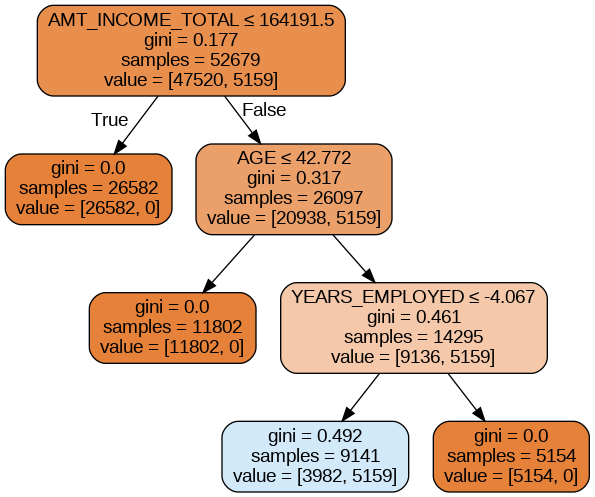

In [57]:
tree_viz(best_dt.model, feature_names=selected_features)

Commentiamo il nostro diagramma:

- Se il cliente ha un reddito inferione a 164191,5 $ non riceverà la carta di credito.
- Se ha un reddito sufficiente ma un età inferiore a 42,8 non riceverà la carta di credito.
- Se ha un reddito sufficiente e ha un età superiore a 42,8 ma ha un'esperienza lavorativa minore di 4 anni o è in pensione, non riceverà la carta di credito.
- Se invece ha anche un sufficiente numero di anni di esperienza lavorativa ha una probabilità del 56% di ricevere la carta.